## Aljowhara Alblaihed

## Employee Turnover Prediction
The project is determine which factors/features have a high effect on employees turnover rate and create models that predict whether an employee will leave the company or not.

### Table of Contents:
<ul>
<li><a href="#A">Exploratory Data Analysis</a></li>
<li><a href="#B">Data Visualization</a></li>
<li><a href="#C">Observations</a></li>
<li><a href="#D">Convert Categorical Data</a></li>   
<li><a href="#E">Split dat</a></li>  
<li><a href="#F">Create Models</a></li>    
<li><a href="#G">Compare Models</a></li>
     
</ul>

### [Data](https://www.kaggle.com/lnvardanyan/hr-analytics)

#### Data Description:
satisfaction_level: It’s the employee satisfaction rate, and values between 0-1.

last_evaluation: It’s evaluated performance by the employer, and values between 0-1.

number_projects: Number of projects completed while at work.

average_monthly_hours: Average monthly hours at workplace.

time_spend_company: Time spent at the company in years.

Work_accident: Whether the employee had a workplace accident, and values 0 or 1.

Left: Whether the employee left the workplace, and values 0 or 1.

promotion_last_5years: Whether the employee was promoted in the last five years.

Sales: Employee’s working department.

Salary: Salary level of the employee and have 3 levels low, medium and high.

### Import Backages

In [1]:
# Make necessary import packages
#EDA
import pandas as pd #Read Data
import numpy as np
#Plots
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import seaborn as sns #Plots
! pip install plotly
import plotly.express as px
#Models
from sklearn.linear_model import LogisticRegression #Logistic Model
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.neighbors import KNeighborsClassifier #KNeighbors Model
from sklearn.ensemble import RandomForestClassifier #Random Forest Model
from sklearn.metrics import accuracy_score #Accuracy Score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score #Recall Score
from sklearn.metrics import classification_report #Classification_report 
import warnings #Ignore waenings message
warnings.filterwarnings('ignore')

<a id='A'></a>
## Exploratory Data Analysis

### Read Data

In [2]:
# Read the employee turnover data
Data = pd.read_csv('turnover.csv')

### Show Data

In [3]:
# Show the first five rows
Data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [4]:
# Show the last five rows
Data.tail()

satisfaction_level  last_evaluation  number_project  \
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales salary  
14994                      0  support    low  
14995                      0  support    low  
14996                      0  support    low  
14997                      0  support    low  
14998                      0  support    low

In [5]:
# Show data
Data.sample(5)

satisfaction_level  last_evaluation  number_project  \
4515                 0.53             0.73               4   
1027                 0.09             0.90               6   
14415                0.87             0.90               5   
10354                0.54             0.48               3   
3670                 0.49             0.92               5   

       average_montly_hours  time_spend_company  Work_accident  left  \
4515                    147                   3              0     0   
1027                    287                   4              0     1   
14415                   254                   6              0     1   
10354                   158                   2              0     0   
3670                    176                   3              0     0   

       promotion_last_5years      sales  salary  
4515                       0      sales     low  
1027                       0  technical     low  
14415                      0    support     low  
10354                      0    support  medium  
3670                       0  marketing     low

In [6]:
# Data shape
Data.shape

(14999, 10)

#### Have 14,999 row and 10 columns/features

In [7]:
# Data information
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Have 10 columns and 14,999 rows, the columns names are satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, sales, salary

In [8]:
Data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Check for missing data

In [9]:
# Check if we have missing values
Data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

#### Not have zeros values

### Check for duplicate data

In [10]:
# Check if we have duplicate data
Data.duplicated().sum()

3008

#### Have 3008 duplicate data

### Remove duplicate data

In [11]:
Data.drop_duplicates(inplace=True)

### Rename column names 

In [12]:
Data= Data.rename(columns={'satisfaction_level':'Satisfaction_Level','last_evaluation':'Last_Evaluation','number_project':'Project_Count','average_montly_hours':'Monthly_Hours_Avg','time_spend_company':'Years_at_Company',
                           'Work_accident':'Work_Accident','left':'TurnedOver',
                           'promotion_last_5years':'Promotion_Last_5years',
                           'sales':'Department', 'salary':'Salary'})
                    

### Data after remove duplicate values and rename columns

In [13]:
# Data after remove duplicate values and rename columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Satisfaction_Level     11991 non-null  float64
 1   Last_Evaluation        11991 non-null  float64
 2   Project_Count          11991 non-null  int64  
 3   Monthly_Hours_Avg      11991 non-null  int64  
 4   Years_at_Company       11991 non-null  int64  
 5   Work_Accident          11991 non-null  int64  
 6   TurnedOver             11991 non-null  int64  
 7   Promotion_Last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   Salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


#### Have 10 columns and 11,991 rows, the columns names are Satisfaction_Level, Last_Evaluation, Project_Count, Monthly_Hours_Avg, Years_at_Company, Work_Accident, TurnedOver, Promotion_Last_5years, Department, Salary

### Understunding Data

In [14]:
Data.Satisfaction_Level.unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

#### The values are between 0 and 1

In [15]:
Data.Last_Evaluation.unique()

array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

#### The values are between 0 and 1

In [16]:
Data.Project_Count.unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [17]:
Data.Monthly_Hours_Avg.unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [18]:
Data.Years_at_Company.unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [19]:
Data.Work_Accident.unique()

array([0, 1], dtype=int64)

#### 1 employees who had workplace accidents , 0 employee who did not have workplace accidents

In [20]:
Data.TurnedOver.unique()

array([1, 0], dtype=int64)

#### 1 employees who left the company, 0 employees who stayed

In [21]:
Data.Promotion_Last_5years.unique()

array([0, 1], dtype=int64)

#### 1 employees who were promoted in the last five years, 0 employees who were not promoted in the last five years

In [22]:
Data.groupby('TurnedOver').mean()

Satisfaction_Level  Last_Evaluation  Project_Count  \
TurnedOver                                                       
0                     0.667365         0.715667       3.786800   
1                     0.440271         0.721783       3.883476   

            Monthly_Hours_Avg  Years_at_Company  Work_Accident  \
TurnedOver                                                       
0                   198.94270          3.262000       0.174500   
1                   208.16223          3.881467       0.052737   

            Promotion_Last_5years  
TurnedOver                         
0                        0.019500  
1                        0.004018

In [23]:
Data.groupby('Salary').mean()

Satisfaction_Level  Last_Evaluation  Project_Count  Monthly_Hours_Avg  \
Salary                                                                          
high              0.643343         0.706838       3.791919         200.067677   
low               0.622655         0.718512       3.801742         200.439199   
medium            0.634723         0.716539       3.806121         200.587341   

        Years_at_Company  Work_Accident  TurnedOver  Promotion_Last_5years  
Salary                                                                      
high            3.493939       0.157576    0.048485               0.044444  
low             3.319686       0.154878    0.204530               0.006620  
medium          3.389850       0.153013    0.146170               0.022999

In [24]:
Data.groupby('Department').mean()

Satisfaction_Level  Last_Evaluation  Project_Count  \
Department                                                        
IT                     0.634016         0.715051       3.797131   
RandD                  0.627176         0.712983       3.850144   
accounting             0.607939         0.721900       3.834138   
hr                     0.621947         0.715691       3.675541   
management             0.631995         0.726307       3.837156   
marketing              0.634770         0.718440       3.720654   
product_mng            0.629825         0.713790       3.794461   
sales                  0.631349         0.710398       3.777092   
support                0.634822         0.722998       3.820977   
technical              0.627937         0.719791       3.859180   

             Monthly_Hours_Avg  Years_at_Company  Work_Accident  TurnedOver  \
Department                                                                    
IT                  200.638320          3.350410       0.142418    0.161885   
RandD               201.291066          3.319885       0.171470    0.122478   
accounting          200.877617          3.404187       0.140097    0.175523   
hr                  199.371048          3.256240       0.133111    0.188020   
management          201.529817          3.981651       0.165138    0.119266   
marketing           199.487370          3.421991       0.160475    0.166419   
product_mng         198.893586          3.341108       0.158892    0.160350   
sales               200.242050          3.380673       0.153751    0.169805   
support             200.627128          3.292696       0.164195    0.171334   
technical           201.115419          3.309269       0.151070    0.173797   

             Promotion_Last_5years  
Department                          
IT                        0.002049  
RandD                     0.030259  
accounting                0.016103  
hr                        0.018303  
management                0.082569  
marketing                 0.040119  
product_mng               0.000000  
sales                     0.017907  
support                   0.008786  
technical                 0.009804

In [25]:
Data.groupby('Work_Accident').mean()

Satisfaction_Level  Last_Evaluation  Project_Count  \
Work_Accident                                                       
0                        0.625546         0.717092       3.805640   
1                        0.652200         0.714438       3.787568   

               Monthly_Hours_Avg  Years_at_Company  TurnedOver  \
Work_Accident                                                    
0                     200.741150          3.364856    0.185978   
1                     199.006486          3.364865    0.056757   

               Promotion_Last_5years  
Work_Accident                         
0                           0.015284  
1                           0.025946

### Correlation Between Features

#### Correlation is a statistical technique that can show whether and how strongly pairs of variables are related and Closer to 1 better is the correlation

In [26]:
Data.corr()

Satisfaction_Level  Last_Evaluation  Project_Count  \
Satisfaction_Level               1.000000         0.095186      -0.133246   
Last_Evaluation                  0.095186         1.000000       0.270256   
Project_Count                   -0.133246         0.270256       1.000000   
Monthly_Hours_Avg               -0.006252         0.264678       0.331516   
Years_at_Company                -0.152915         0.096829       0.188837   
Work_Accident                    0.039940        -0.005695      -0.005612   
TurnedOver                      -0.350558         0.013520       0.030928   
Promotion_Last_5years            0.019789        -0.007206      -0.000544   

                       Monthly_Hours_Avg  Years_at_Company  Work_Accident  \
Satisfaction_Level             -0.006252         -0.152915       0.039940   
Last_Evaluation                 0.264678          0.096829      -0.005695   
Project_Count                   0.331516          0.188837      -0.005612   
Monthly_Hours_Avg               1.000000          0.102875      -0.012860   
Years_at_Company                0.102875          1.000000       0.000003   
Work_Accident                  -0.012860          0.000003       1.000000   
TurnedOver                      0.070409          0.173295      -0.125436   
Promotion_Last_5years          -0.004964          0.056828       0.029852   

                       TurnedOver  Promotion_Last_5years  
Satisfaction_Level      -0.350558               0.019789  
Last_Evaluation          0.013520              -0.007206  
Project_Count            0.030928              -0.000544  
Monthly_Hours_Avg        0.070409              -0.004964  
Years_at_Company         0.173295               0.056828  
Work_Accident           -0.125436               0.029852  
TurnedOver               1.000000              -0.044657  
Promotion_Last_5years   -0.044657               1.000000

<a id='B'></a>
## Data Visualization

### Target Distribution

0    10000
1     1991
Name: TurnedOver, dtype: int64

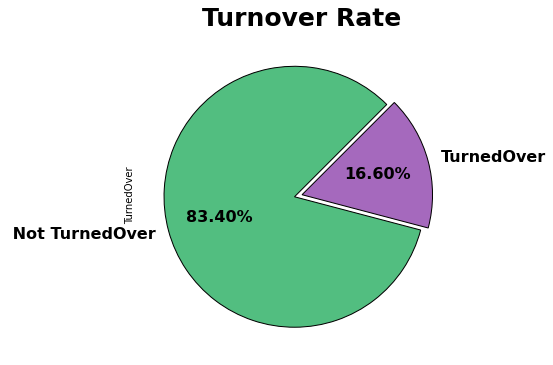

In [27]:
# Target Distribution
plt.figure(figsize=(6,6))
labels= ' Not TurnedOver','TurnedOver'
plt.title("Turnover Rate", fontsize=25, fontweight='bold')
Data.TurnedOver.value_counts().plot.pie(explode= (0.06 , 0.0), autopct='%1.2f%%', startangle=45 ,labels= labels, textprops={'fontsize': 16, 'fontweight':'bold'} ,  
   wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True} ,colors={'#A569BD', '#52BE80'})
Data['TurnedOver'].value_counts()

#### 83.40% of employees stayed (not turnover) and 16.60% of employee left the company (turnover)

#### 0 for Not TurnedOver
#### 1 for TurnedOver

### Features Relationship based on TurnedOver (Target)

<Figure size 720x360 with 0 Axes>

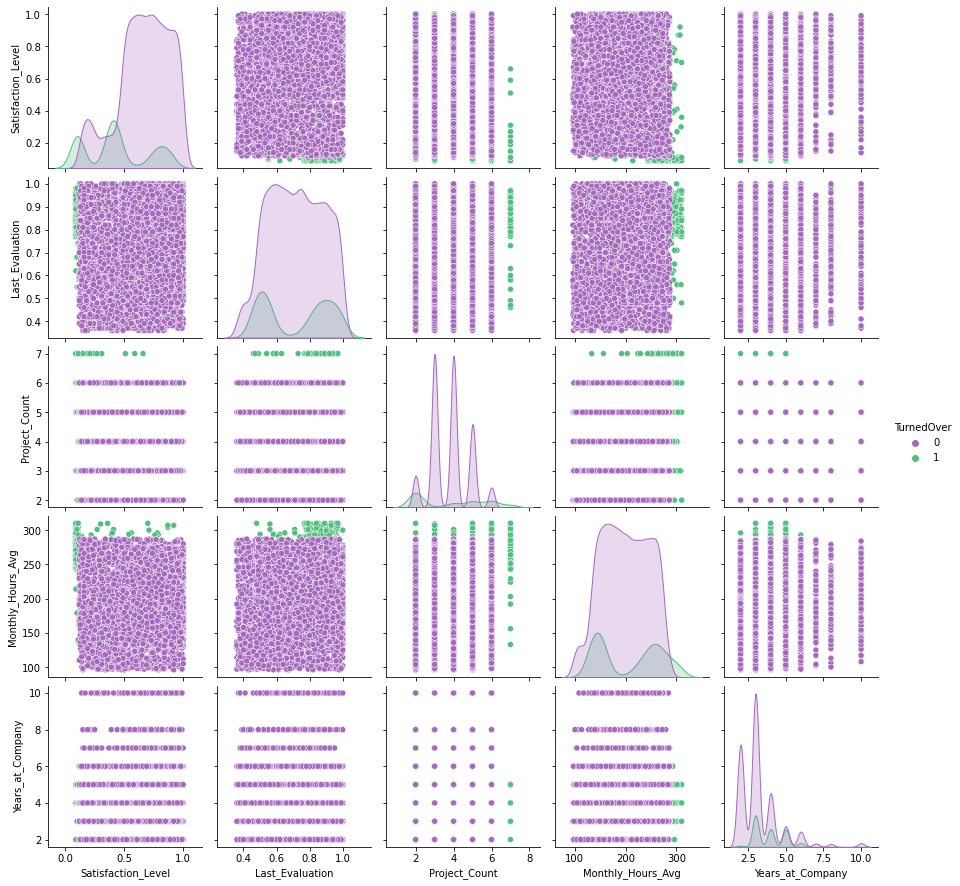

In [28]:
# plotting for Distribution of Numerical features
fig = plt.figure(figsize=(10,5))
sns.pairplot(Data, hue = 'TurnedOver', vars = ['Satisfaction_Level', 'Last_Evaluation', 'Project_Count', 'Monthly_Hours_Avg','Years_at_Company'], palette= ['#A569BD', '#52BE80'])

### Correlation Between Features

Text(0.5, 1.0, 'Correlation Between Features')

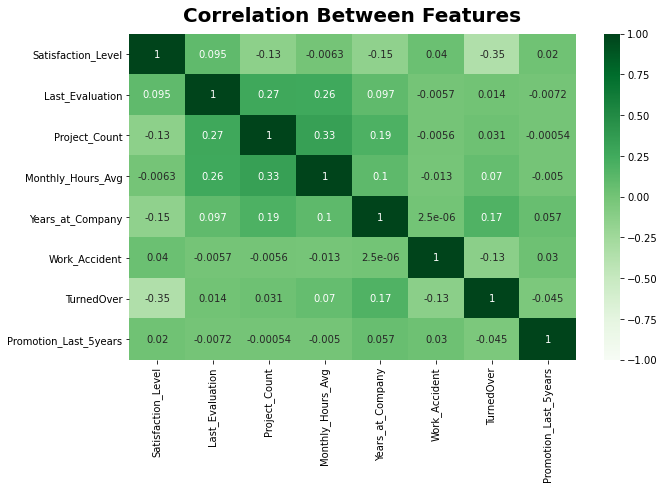

In [29]:
plt.figure(figsize=(10, 6))
Correlation = sns.heatmap(Data.corr(), vmin=-1, vmax=1, annot=True, cmap ='Greens')
Correlation.set_title('Correlation Between Features', fontweight='bold', fontdict={'fontsize':20}, pad=12)

#### Can see that there is a high correlation between Turnover and Satisfaction_Level

### Employees Satisfaction Rate based on Turnover

In [30]:
df = px.data.tips()
fig = px.histogram(Data, x="Satisfaction_Level", nbins=20, color='TurnedOver',
                  title='Employees Satisfaction Rate based on Turnover',  width=800, height=500,
                   labels={'Satisfaction_Level':'Satisfaction Rate'}, template='simple_white',
                   color_discrete_sequence = ['#A569BD', '#52BE80']
                   )

#Rename legend 
newnames = {'0':'Not TurnedOver', '1': 'TurnedOver'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
#title  style               
                  )
fig.update_layout(
            title={
            'x':0.5,
            'xanchor': 'center'
        })

#Legend 
fig.update_layout(legend_borderwidth=.7)
fig.show()


#### Employees with a satisfaction rate of 0.5 or less tend to leave the company are more than employees with a satisfaction rate of more than 0.5

### Employees Evaluation Rate based on Turnover

In [31]:
df = px.data.tips()
fig = px.histogram(Data, x="Last_Evaluation",nbins=20, color='TurnedOver',
                  title='Employees Evaluation Rate based on Turnover',  width=800, height=500,
                   labels={'Last_Evaluation':'Evalution'}, template='simple_white',
                   color_discrete_sequence = ['#A569BD', '#52BE80']
                   )

#Rename legend 
newnames = {'0':'Not TurnedOver', '1': 'TurnedOver'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
                       

#title  style               
fig.update_layout(
            title={
            'x':0.5,
            'xanchor': 'center'
        })

#Legend 
fig.update_layout(legend_borderwidth=.7)
fig.show()

#### Employees with low and high evaluation tend to leave the company

### Project Count per Employee based on  Turnover

In [32]:
df = px.data.tips()
fig = px.histogram(Data, x="Project_Count",nbins=20, color='TurnedOver',
                  title='Project Count per Employee based on Turnover',  width=800, height=500,
                   labels={'Project_Count':'Project Count'}, template='simple_white',
                   color_discrete_sequence = ['#A569BD', '#52BE80']
                   )

#Rename legend 
newnames = {'0':'Not TurnedOver', '1': 'TurnedOver'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                   
                  )

#title  style               
fig.update_layout(
            title={
            'x':0.5,
            'xanchor': 'center'
        })


#Legend
fig.update_layout(legend_borderwidth=.7)
fig.show()

#### Most of the employees who not leave the company have worked on three projects and most of the employees who leave the company have worked on two projects

### Average of mothly work hour per Employee based on Turnover

In [33]:
df = px.data.tips()
fig = px.histogram(Data, x="Monthly_Hours_Avg",nbins=20, color='TurnedOver',
                  title='Average of Monthly Work Hour per Employee based on Turnover',  width=800, height=500,
                   labels={'Monthly_Hours_Avg':'Monthly Hours Average'}, template='simple_white',
                   color_discrete_sequence = ['#A569BD', '#52BE80']
                   )

#Rename legend 
newnames = {'0':'Not TurnedOver', '1': 'TurnedOver'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                   
                  )
#title  style               
fig.update_layout(
            title={
            'x':0.5,
            'xanchor': 'center'
        })

#Legend
fig.update_layout(legend_borderwidth=.7)
fig.show()

#### Average of mothly work hour to employees that leave the company are more than employees that did not leave the company

### Years worked in the company per employee based on turnover

In [34]:
df = px.data.tips()
fig = px.histogram(Data, x="Years_at_Company",nbins=20, color='TurnedOver',
                  title='Years Worked in The Company per Employee based on Turnover',  width=800, height=500,
                   labels={'Years_at_Company':'Years in the Company'}, template='simple_white',
                   color_discrete_sequence = ['#A569BD', '#52BE80']
                   )

#Rename legend 
newnames = {'0':'Not TurnedOver', '1': 'TurnedOver'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                   
                  )

#title  style               
fig.update_layout(
            title={
            'x':0.5,
            'xanchor': 'center'
        })

#Legend
fig.update_layout(legend_borderwidth=.7)
fig.show()

#### Most of the employees have 3 years of experience in the company

### Work Accident per Employee based on Turnover

In [35]:
df = px.data.tips()
fig = px.histogram(Data, x="Work_Accident",nbins=20, color='TurnedOver',
                  title='Work Accident per Employee based on Turnover',  width=800, height=500,
                   labels={'Work_Accident':'Work Accident'}, template='simple_white',
                   color_discrete_sequence = ['#A569BD', '#52BE80']
                   )

#Rename legend 
newnames = {'0':'Not TurnedOver', '1': 'TurnedOver'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                   
                  )
#Legend border
fig.update_layout(legend_borderwidth=.7)

#title  style               
fig.update_layout(
            title={
            'x':0.5,
            'xanchor': 'center'
        })

fig.show()

#### Employees who have had work accidents are less likely to leave than employees who have not experienced work accidents

### Promotion in the previous five years per Employee based on Turnover

In [36]:
df = px.data.tips()
fig = px.histogram(Data, x="Promotion_Last_5years",nbins=20, color='TurnedOver',
                  title='Promotion in the Previous Five Years per Employee based on Turnover',  width=800, height=500,
                   labels={'Promotion_Last_5years':'Promotion'}, template='simple_white',
                   color_discrete_sequence = ['#A569BD', '#52BE80']
                   )

#Rename legend 
newnames = {'0':'Not TurnedOver', '1': 'TurnedOver'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                   
                  )

#Legend border
fig.update_layout(legend_borderwidth=.7)

#title  style               
fig.update_layout(
            title={
            'x':0.5,
            'xanchor': 'center'
        })

fig.show()

#### Most of the employees who leave the company did not get a promotion in the previous five years

### Employee Departments based on Turnover

In [37]:
df = px.data.tips()
fig = px.histogram(Data, x="Department",nbins=20, color='TurnedOver',
                  title='Employee Departments based on Turnover',  width=800, height=500,
                   labels={'Department':'Departments'}, template='simple_white',
                   color_discrete_sequence = ['#A569BD', '#52BE80']
                   )


#Rename legend 
newnames = {'0':'Not TurnedOver', '1': 'TurnedOver'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                   
                  )

#Legend border
fig.update_layout(legend_borderwidth=.7)

#title  style               
fig.update_layout(
            title={
            'x':0.5,
            'xanchor': 'center'
        })

fig.show()

#### The department most employees tend to leave in the sales then the technical then sports department

### Employee Salaries based on Turnover

In [38]:
df = px.data.tips()
fig = px.histogram(Data, x="Salary",nbins=20, color='TurnedOver',
                  title='Employee Salaries based on Turnover',  width=800, height=500,
                   template='simple_white',
                   color_discrete_sequence = ['#A569BD', '#52BE80']
                   )

#Rename legend 
newnames = {'0':'Not TurnedOver', '1': 'TurnedOver'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                   
                  )

#Legend border
fig.update_layout(legend_borderwidth=.7)

#title  style               
fig.update_layout(
            title={
            'x':0.5,
            'xanchor': 'center'
        })

fig.show()

#### Employees who have a low to medium salary tend to leave the company

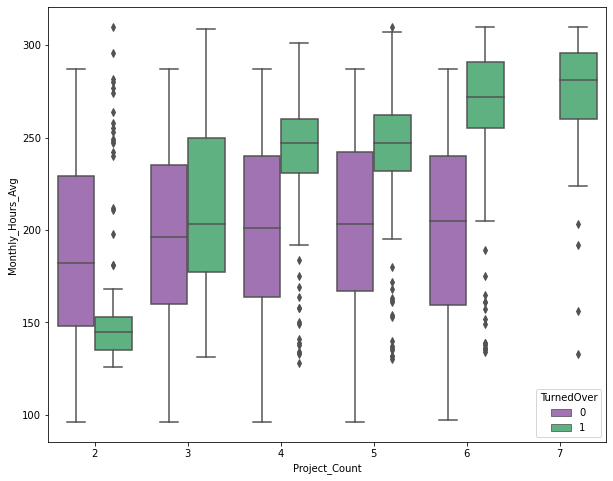

In [39]:
fig = plt.figure(figsize=(10,8),)
my_palette = {0: "#A569BD", 1: "#52BE80"} 
ax=sns.boxplot(data=Data, x="Project_Count", y="Monthly_Hours_Avg", hue="TurnedOver", palette=my_palette)

#### Employees who have an increase in average of mothly work hour with the increase in projects

<a id='C'></a>
## Observations:

#### High correlation between turnover and satisfaction rate.
#### Employees with a satisfaction rate of 0.5 or less tend to leave the company are more than employees with a satisfaction rate of more than 0.5.
#### Employees with low and high evaluation tend to leave the company.
#### Most of the employees who not leave the company have worked on three projects and most of the employees who leave the company have worked on two projects.
#### Average of mothly work hour to employees that leave the company are more than employees that did not leave the company.
#### Most of the employees have 3 years of experience in the company.
#### Employees who have had work accidents are less likely to leave than employees who have not experienced work accidents.
#### Most of the employees who leave the company did not get a promotion in the previous five years.
#### The department most employees tend to leave in the sales then the technical then sports department.
#### Employees who have a low to medium salary tend to leave the company.
#### Employees who have an increase in average of mothly work hour with the increase in projects.

## Data Preaper for Modeling

<a id='D'></a>
## Convert Categorical Data

In [40]:
# Convert categorical data to dummies(numeric)
Data= pd.get_dummies(Data, columns=['Department','Salary'])

#### Because the Department and Salary not numbers
#### Machine learning models require all input and output variables to be numeric. This means that if your data contains categorical data, you must convert  it to numbers before you can fit and evaluate a model


<a id='E'></a>
## Split data into training and testing datasets

In [41]:
from sklearn.model_selection import train_test_split
x = Data.drop(['TurnedOver'], axis=1)  #All columns expect the target column (TurnedOver)
y = Data.TurnedOver #Target column 

cols = x.columns  #All columns expect the target column (TurnedOver)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.70 , random_state=42) #Spilt data to train and test

In [42]:
# Show X_train data
pd.DataFrame(X_train, columns=cols) #cols: All columns expect the target column (TurnedOver)

Satisfaction_Level  Last_Evaluation  Project_Count  Monthly_Hours_Avg  \
6957                 0.96             0.37              3                111   
9240                 0.19             1.00              4                188   
618                  0.45             0.57              2                148   
9296                 0.72             0.79              4                154   
6030                 0.54             0.82              2                279   
...                   ...              ...            ...                ...   
11973                0.49             0.71              4                178   
5200                 0.77             0.52              4                216   
5399                 0.84             0.53              5                190   
861                  0.43             0.48              2                144   
7279                 0.46             0.41              6                148   

       Years_at_Company  Work_Accident  Promotion_Last_5years  Department_IT  \
6957                  2              0                      0              0   
9240                  4              1                      0              0   
618                   3              0                      0              0   
9296                  3              0                      0              1   
6030                  3              1                      0              0   
...                 ...            ...                    ...            ...   
11973                 8              0                      0              1   
5200                  3              0                      0              0   
5399                  3              0                      0              0   
861                   3              0                      0              0   
7279                  4              0                      0              0   

       Department_RandD  Department_accounting  Department_hr  \
6957                  0                      0              0   
9240                  0                      0              0   
618                   0                      0              0   
9296                  0                      0              0   
6030                  0                      0              0   
...                 ...                    ...            ...   
11973                 0                      0              0   
5200                  0                      0              0   
5399                  0                      0              0   
861                   0                      0              0   
7279                  0                      0              0   

       Department_management  Department_marketing  Department_product_mng  \
6957                       0                     0                       0   
9240                       0                     1                       0   
618                        0                     1                       0   
9296                       0                     0                       0   
6030                       0                     1                       0   
...                      ...                   ...                     ...   
11973                      0                     0                       0   
5200                       0                     0                       0   
5399                       0                     0                       0   
861                        0                     0                       0   
7279                       0                     0                       0   

       Department_sales  Department_support  Department_technical  \
6957                  1                   0                     0   
9240                  0                   0                     0   
618                   0                   0                     0   
9296                  0                   0                     0   
6030                  

In [43]:
len(X_train), len(y_train) #70% of data for train

(8393, 8393)

In [44]:
len(X_test), len(y_test) #30% of data for test

(3598, 3598)

In [45]:
y_train.value_counts(normalize=True)

0    0.834624
1    0.165376
Name: TurnedOver, dtype: float64

<a id='F'></a>
## Create Models

Precision = True Positives/(True Positives + False Positives)

Recall = True Positives/(True Positives + False Negatives)

F1-score is a measure of a model's accuracy on a dataset. It is used to evaluate binary classification systems and the calculated 2 * ( (Precision * Recall) / (Precision + Recall) )

Accuracy = True Positives + True Negaitve/(Total Data)

Support is the number of actual occurrences of the class in the specified dataset.

### Note:
F1 score is usually more useful than accuracy, especially if you have an uneven class distribution.

### Baseline Model

In [50]:
def baseline_model(n_predictions, value_to_predict):
    
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_train)  # how many predictions to make? test to train
baseline_value = y_train.value_counts().index[0]  # what value to predict? (classification = most common class) #target (o for Notturnover)

baseline_preds=baseline_model(n_predictions, baseline_value)
baseline_preds

0       0
1       0
2       0
3       0
4       0
       ..
8388    0
8389    0
8390    0
8391    0
8392    0
Length: 8393, dtype: int64

In [52]:
n_predictions = len(y_test) # number of y_test
n_predictions

3598

In [53]:
y_train.value_counts().index[0]

0

In [54]:
# Baseline Prediction
baseline_preds = baseline_model(n_predictions, baseline_value)

In [57]:
print(classification_report(y_test, baseline_preds))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2995
           1       0.00      0.00      0.00       603

    accuracy                           0.83      3598
   macro avg       0.42      0.50      0.45      3598
weighted avg       0.69      0.83      0.76      3598



In [66]:
Baseline = f1_score(y_test, baseline_preds)
Baseline

0.0

### Confusion Matrix

Text(0.5, 37.0, 'Predicted Classes')

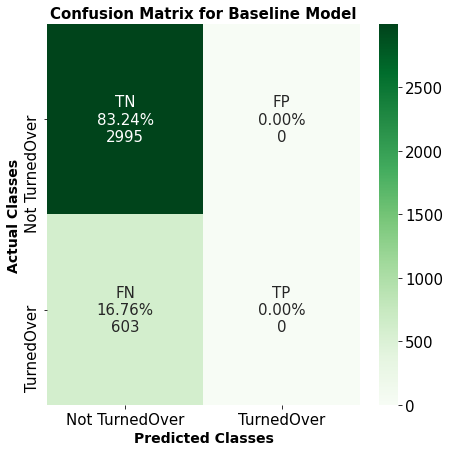

In [158]:
cf = confusion_matrix(y_test, baseline_preds)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(7,7))
labelsInner = ['Not TurnedOver', 'TurnedOver']
sns.heatmap(cf, annot=labels, fmt='',  cmap='Greens', yticklabels=labelsInner , xticklabels=labelsInner).set_title("Confusion Matrix for Baseline Model", fontsize=15, fontweight='bold');
plt.ylabel('Actual Classes', fontsize = 14, fontweight='bold')
plt.xlabel('Predicted Classes', fontsize = 14, fontweight='bold')

TP = 0.00% predicted Employee turnover, is Employee turnover.

FP = 0.00% predicted Employee turnover, is Employee not turnover.

TN = 83.24% predicted Employee not turnover, is Employee not turnover.

FN = 16.76% predicted Employee not turnover, is Employee turnover.

### Logistic Regression

In [67]:
SL = LogisticRegression(max_iter=100) #Maximum number of iterations of the optimization algorithm

In [68]:
#fit Logistic Model
SL.fit(X_train, y_train)

LogisticRegression()

In [69]:
X_train.head()

Satisfaction_Level  Last_Evaluation  Project_Count  Monthly_Hours_Avg  \
6957                0.96             0.37              3                111   
9240                0.19             1.00              4                188   
618                 0.45             0.57              2                148   
9296                0.72             0.79              4                154   
6030                0.54             0.82              2                279   

      Years_at_Company  Work_Accident  Promotion_Last_5years  Department_IT  \
6957                 2              0                      0              0   
9240                 4              1                      0              0   
618                  3              0                      0              0   
9296                 3              0                      0              1   
6030                 3              1                      0              0   

      Department_RandD  Department_accounting  Department_hr  \
6957                 0                      0              0   
9240                 0                      0              0   
618                  0                      0              0   
9296                 0                      0              0   
6030                 0                      0              0   

      Department_management  Department_marketing  Department_product_mng  \
6957                      0                     0                       0   
9240                      0                     1                       0   
618                       0                     1                       0   
9296                      0                     0                       0   
6030                      0                     1                       0   

      Department_sales  Department_support  Department_technical  Salary_high  \
6957                 1                   0                     0            1   
9240                 0                   0                     0            0   
618                  0                   0                     0            1   
9296                 0                   0                     0            0   
6030                 0                   0                     0            0   

      Salary_low  Salary_medium  
6957           0              0  
9240           0              1  
618            0              0  
9296           0              1  
6030           1              0

In [70]:
# Logistic Regression Prediction
SL_pred = SL.predict(X_test)
SL_pred 

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

### Classification Report

In [71]:
print(classification_report(y_test, SL_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2995
           1       0.47      0.17      0.25       603

    accuracy                           0.83      3598
   macro avg       0.66      0.57      0.58      3598
weighted avg       0.79      0.83      0.79      3598



In [72]:
logistic = f1_score(y_test, SL_pred)
logistic 

0.2506082725060827

### Confusion Matrix for Logistic Regression

Text(0.5, 37.0, 'Predicted Classes')

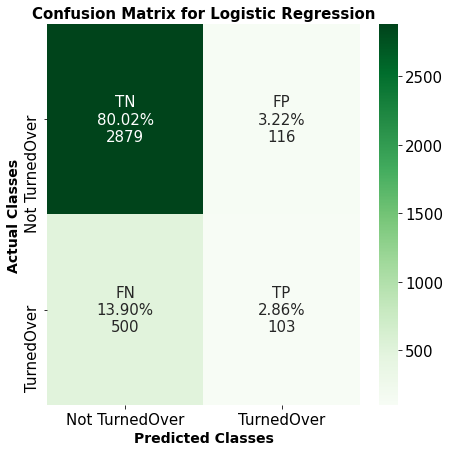

In [160]:
cf = confusion_matrix(y_test, SL_pred)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(7,7))
labelsInner = ['Not TurnedOver', 'TurnedOver']
sns.heatmap(cf, annot=labels, fmt='',  cmap='Greens', yticklabels=labelsInner , xticklabels=labelsInner).set_title("Confusion Matrix for Logistic Regression", fontsize=15, fontweight='bold');
plt.ylabel('Actual Classes', fontsize = 14, fontweight='bold')
plt.xlabel('Predicted Classes', fontsize = 14, fontweight='bold')

TP = 2.86% predicted Employee turnover, is Employee turnover.

FP = 3.22% predicted Employee turnover, is Employee not turnover.

TN = 80.02% predicted Employee not turnover, is Employee not turnover.

FN = 13.90% predicted Employee not turnover, is Employee turnover.

### K-Nearest Neighbors (KNN) Model

In [128]:
knns = KNeighborsClassifier(n_neighbors=4) #Number of neighbors to use

In [129]:
knns.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [130]:
knns_preds = knns.predict(X_test)
knns_preds

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### Classification Report

In [133]:
print(classification_report(y_test, knns_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2995
           1       0.86      0.83      0.85       603

    accuracy                           0.95      3598
   macro avg       0.91      0.90      0.91      3598
weighted avg       0.95      0.95      0.95      3598



In [134]:
KNN = f1_score(y_test, knns_preds)
KNN

0.8460891505466779

### Confusion Matrix for k-nearest Neighbors

Text(0.5, 37.0, 'Predicted Classes')

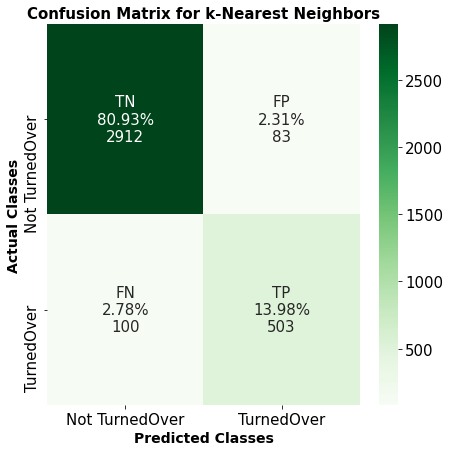

In [161]:
cf = confusion_matrix(y_test, knns_preds)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(7,7))
labelsInner = ['Not TurnedOver', 'TurnedOver']
sns.heatmap(cf, annot=labels, fmt='',  cmap='Greens', yticklabels=labelsInner , xticklabels=labelsInner).set_title("Confusion Matrix for k-Nearest Neighbors", fontsize=15, fontweight='bold');
plt.ylabel('Actual Classes', fontsize = 14, fontweight='bold')
plt.xlabel('Predicted Classes', fontsize = 14, fontweight='bold')

TP = 13.98% predicted Employee turnover, is Employee turnover.

FP = 2.31% predicted Employee turnover, is Employee not turnover.

TN = 80.93% predicted Employee not turnover, is Employee not turnover.

FN = 2.78% predicted Employee not turnover, is Employee turnover.

### Random Forest Classifier Model

In [136]:
RandomF = RandomForestClassifier(random_state=42)
RandomF = RandomF.fit(X_train, y_train)

In [137]:
RandomF_preds = RandomF.predict(X_test)
RandomF_preds

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### Classification Report

In [138]:
print(classification_report(y_test, RandomF_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2995
           1       0.98      0.91      0.94       603

    accuracy                           0.98      3598
   macro avg       0.98      0.95      0.96      3598
weighted avg       0.98      0.98      0.98      3598



In [139]:
RandomF = f1_score(y_test, RandomF_preds)
RandomF

0.9397590361445782

### Confusion Matrix for Random Forest Classifier

Text(0.5, 37.0, 'Predicted Classes')

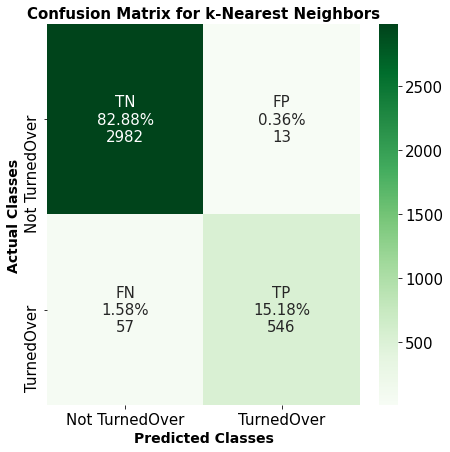

In [164]:
cf = confusion_matrix(y_test, RandomF_preds)
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
 
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
          zip(names, perc, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(7,7))
labelsInner = ['Not TurnedOver', 'TurnedOver']
sns.heatmap(cf, annot=labels, fmt='',  cmap='Greens', yticklabels=labelsInner , xticklabels=labelsInner).set_title("Confusion Matrix for k-Nearest Neighbors", fontsize=15, fontweight='bold');
plt.ylabel('Actual Classes', fontsize = 14, fontweight='bold')
plt.xlabel('Predicted Classes', fontsize = 14, fontweight='bold')

TP = 15.18% predicted Employee turnover, is Employee turnover.

FP = 0.36% predicted Employee turnover, is Employee not turnover.

TN = 82.88% predicted Employee not turnover, is Employee not turnover.

FN = 1.58% predicted Employee not turnover, is Employee turnover.

<a id='G'></a>
## Compare Models

### Which model gives the best result ?

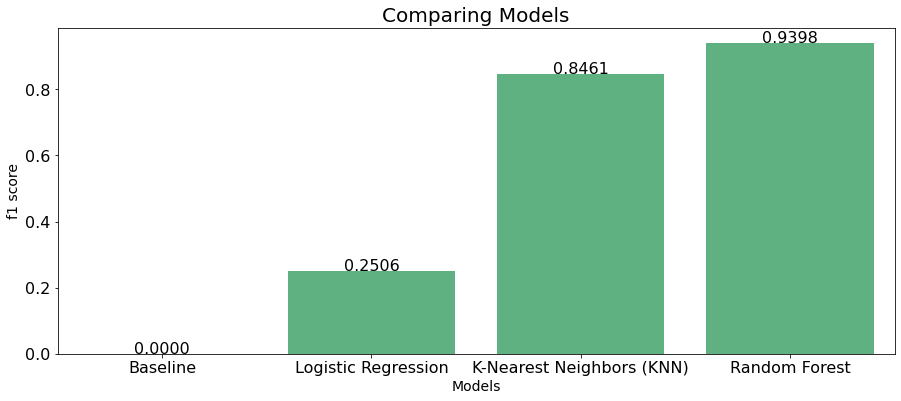

In [142]:
plt.figure(figsize=(15, 6))
f1_scores = pd.DataFrame()
# create name list
f1_scores['names'] = ['Baseline','Logistic Regression','K-Nearest Neighbors (KNN)','Random Forest']
# the values 
f1_scores['values'] = [baseline, logistic, KNN, RandomF]
# barblot using seaborn 
splot=sns.barplot(x="names",y="values",data=f1_scores, color='#52BE80')
# the percentage
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("f1 score", size=14)
plt.title('Comparing Models',fontsize=20);

### Achieved the best result in Random Forest Classifier Model with 93.9% score

#### Conclusion:
#### The baseline model was very poorly performing and f1 score is 0.
#### Have an uneven class distribution.